In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
zip_file_path = '/content/drive/MyDrive/AviaryDataset-20240617T141813Z-001.zip'

# Specify the extraction path
extracted_path = '/content/drive/MyDrive/'

# Unzip the file
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [ ]:
import pathlib

# Define the path to your dataset directory
data_dir = pathlib.Path("/content/drive/MyDrive/AviaryDataset")


In [ ]:
for item in data_dir.iterdir():
    print(item)

/content/drive/MyDrive/AviaryDataset/budgies
/content/drive/MyDrive/AviaryDataset/greyparrot
/content/drive/MyDrive/AviaryDataset/lovebirds
/content/drive/MyDrive/AviaryDataset/cockatoo
/content/drive/MyDrive/AviaryDataset/doves
/content/drive/MyDrive/AviaryDataset/ringnecks
/content/drive/MyDrive/AviaryDataset/lorikeet
/content/drive/MyDrive/AviaryDataset/finches
/content/drive/MyDrive/AviaryDataset/rawparrots
/content/drive/MyDrive/AviaryDataset/scarletmacaw
/content/drive/MyDrive/AviaryDataset/bluegoldmacaw
/content/drive/MyDrive/AviaryDataset/hyacinthmacaw
/content/drive/MyDrive/AviaryDataset/amazonparrot


/content/drive/MyDrive/AviaryDataset/budgies/43.jpg


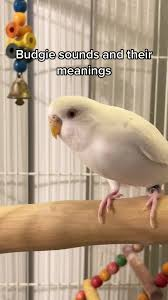

In [ ]:
budgies = list(data_dir.glob('budgies/*'))
print(budgies[50])
PIL.Image.open(str(budgies[50]))

In [ ]:
img_height,img_width=180,180
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="rgb"
  )

Found 1987 files belonging to 13 classes.
Using 1590 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="rgb"
  )

Found 1987 files belonging to 13 classes.
Using 397 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['amazonparrot', 'bluegoldmacaw', 'budgies', 'cockatoo', 'doves', 'finches', 'greyparrot', 'hyacinthmacaw', 'lorikeet', 'lovebirds', 'rawparrots', 'ringnecks', 'scarletmacaw']


In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/AviaryDataset/amazonparrot"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/drive/MyDrive/AviaryDataset/amazonparrot/94.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/AviaryDataset/amazonparrot/97.jpg is a webp, not accepted by TensorFlow


In [ ]:
for item in data_dir.iterdir():
    print(item)

/content/drive/MyDrive/AviaryDataset/amazonparrot
/content/drive/MyDrive/AviaryDataset/bluegoldmacaw
/content/drive/MyDrive/AviaryDataset/budgies
/content/drive/MyDrive/AviaryDataset/cockatoo
/content/drive/MyDrive/AviaryDataset/doves
/content/drive/MyDrive/AviaryDataset/finches
/content/drive/MyDrive/AviaryDataset/greyparrot
/content/drive/MyDrive/AviaryDataset/hyacinthmacaw
/content/drive/MyDrive/AviaryDataset/lorikeet
/content/drive/MyDrive/AviaryDataset/lovebirds
/content/drive/MyDrive/AviaryDataset/rawparrots
/content/drive/MyDrive/AviaryDataset/ringnecks
/content/drive/MyDrive/AviaryDataset/scarletmacaw


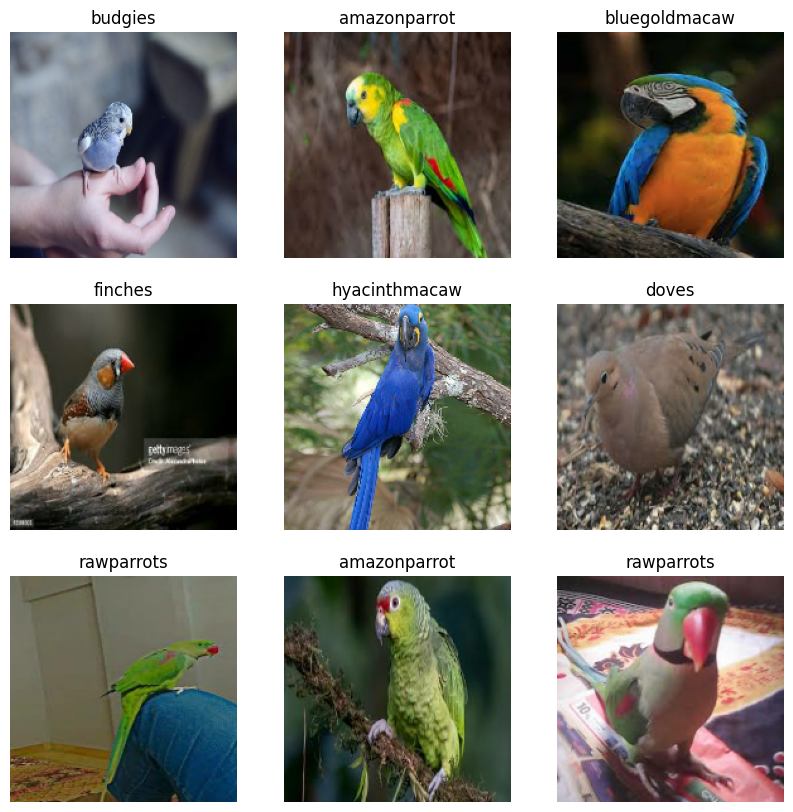

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for images, labels in train_ds.take(1):
    print(images.shape)

(32, 180, 180, 3)


In [ ]:
num_classes = 13

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 16s 201ms/step - loss: 2.5564 - accuracy: 0.1579 - val_loss: 2.3703 - val_accuracy: 0.2746
Epoch 2/100
50/50 [==============================] - 10s 177ms/step - loss: 2.0315 - accuracy: 0.3742 - val_loss: 2.0290 - val_accuracy: 0.3804
Epoch 3/100
50/50 [==============================] - 10s 181ms/step - loss: 1.5021 - accuracy: 0.5509 - val_loss: 1.8064 - val_accuracy: 0.4685
Epoch 4/100
50/50 [==============================] - 10s 174ms/step - loss: 1.0896 - accuracy: 0.6597 - val_loss: 1.8068 - val_accuracy: 0.4962
Epoch 5/100
50/50 [==============================] - 10s 183ms/step - loss: 0.7396 - accuracy: 0.7792 - val_loss: 1.9115 - val_accuracy: 0.5189
Epoch 6/100
50/50 [==============================] - 10s 172ms/step - loss: 0.4507 - accuracy: 0.8585 - val_loss: 2.3364 - val_accuracy: 0.4861
Epoch 7/100
50/50 [==============================] - 9s 166ms/step - loss: 0.2541 - accuracy: 0.9245 - val_loss: 2.5698 - val_accuracy: 0.4962
Epoch

In [ ]:
model.save('/content/drive/MyDrive/tmp/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/tmp/model.h5')

In [ ]:
import numpy as np
from PIL import Image

def predict_image1(img):
    # Ensure img is a PIL Image
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)

    # Resize image to 180x180
    img_resized = img.resize((180, 180))

    # Convert image to numpy array and reshape
    img_array = np.array(img_resized)
    if img_array.shape != (180, 180, 3):
        raise ValueError("Image shape is not (180, 180, 3) after resizing.")

    img_3d = img_array.reshape(-1, 180, 180, 3)
    prediction = model.predict(img_3d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(13)}
